[View in Colaboratory](https://colab.research.google.com/github/alvarogg777/colabCompression/blob/master/Compress_Lab1.ipynb)

In this Lab, we will analyse the results of the application of a quantization function Q(x), in terms of image blurring, the acquired distortion and the entropy caused.

In [0]:
import matplotlib.image as mpimg
from skimage import io,color
from matplotlib import pyplot as plt
import numpy as np
import math
import urllib
lena_link='https://www.ece.rice.edu/~wakin/images/lena512.bmp'
local_lena,headers=urllib.request.urlretrieve(lena_link,'lena512.bmp')
lena=plt.imread(local_lena)

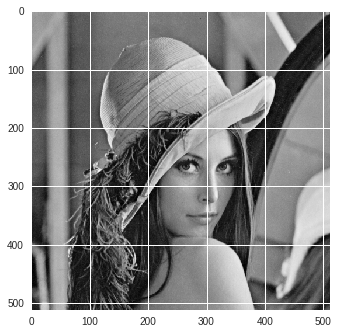

In [3]:
plt.figure()
plt.imshow(lena,cmap='gray')

In [0]:
def getDelta(img,L):
  maximum=np.max(img)
  minimum=np.min(img)
  return (maximum-minimum)/L

In [0]:
def quantizer(input_img,R):#,delta):
  L=2**R
  delta=getDelta(input_img,L)
  minimum=np.min(input_img)
  x,y=input_img.shape
  quantizedImg=np.empty_like(input_img)
  for i in range(x): 
    for j in range(y):
      quantizedImg[i,j]=math.floor((input_img[i,j]-minimum)/delta+0.5)*delta+minimum
  #get quantized transformation axis
  quantX=np.linspace(0,255,256,dtype=int)#0..255
  quantY={}
  for index,value in enumerate(quantX):
    quantY[index]=math.floor(((value-minimum)/delta)+0.5)*delta + minimum
  transformation=[quantX,quantY.values()]
  return [[quantizedImg,delta,minimum],transformation]

In [0]:
# def dequantizer(input_img,delta,minimum):
#   deqImg=np.zeros(input_img.shape)
#   x,y=input_img.shape
#   for i in range(x):
#     for j in range(y):
#       deqImg[i,j]=delta*(input_img[i,j])+minimum
#   return deqImg

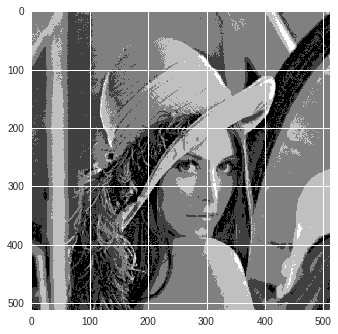

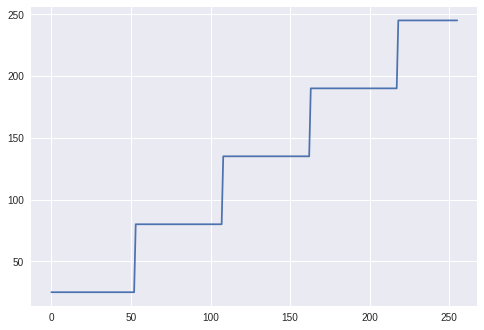

In [7]:
def plotQuantization(input_img,R):
  quantized,characteristic=quantizer(input_img,R)
  quantizedImg=quantized[0]
  plt.figure()
  plt.imshow(quantizedImg,cmap='gray')
  plt.figure()
  plt.plot(characteristic[0],characteristic[1])
plotQuantization(lena,2)

Here we can easily see the typical shape of the plot I/O of an uniform quantizer: a stair plot with the steps corresponding to the quantized levels.
Depending on the quantizer function Q(x) the plot can show 2^R or 2^R + 1 steps: this is the second case, since the function presents a floor(x), which makes the maximal output quantized to an additional maximal level ( supposing R = 1 in the interval [0, 10], [0,5) will be in the first quantization level, [5,10) in the second and {10} will have its own quantized level, the +1 one)

In [0]:
from sklearn.metrics import mean_squared_error as mse
def getDistortion(input_img,R):
  quantized,characteristic=quantizer(input_img,R)
  quantizedImg=quantized[0]
#   print(len())
#     https://stackoverflow.com/questions/16774849/mean-squared-error-in-numpy
#   MSE=mse(input_img,quantizedImg)
  MSE = np.mean(np.power(np.subtract(input_img,quantizedImg),2))#.mean()
  return MSE

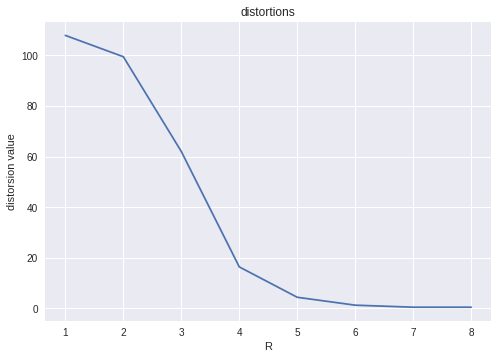

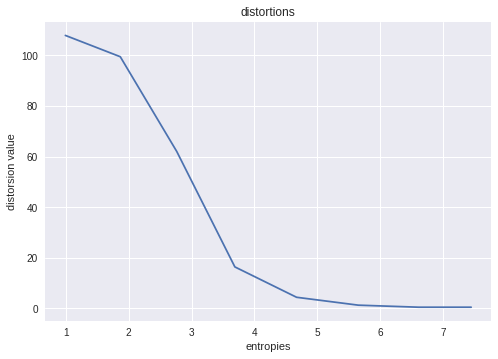

In [9]:
def plotDistorsions():
  distortions={}
  x=np.arange(1,9)
  for i in x:#R 1 to 8
    distortions[i]=getDistortion(lena,i)
#     print(distortions,len(distortions))
  plt.figure()
  plt.title('distortions')
  plt.xlabel('R')
  plt.ylabel('distorsion value')
  plt.plot(x,distortions.values())
  
  
  
 #for later
  plt.figure()
  plt.title('distortions')
  plt.xlabel('entropies')
  plt.ylabel('distorsion value')
 
  entr=[ 0.9929622808959664,1.865850529586504,2.7641416149808102,3.6879878851405414,4.6693081846216025,5.652046037474365,6.610856457250506,7.44550671970822]
  plt.plot(entr,distortions.values())
 
plotDistorsions()

Increasing R, it appears evident the trend of the distortion: since the accuracy of the representation of the image increases through the increase of R, the distortion will obviously decreases. The error between the input and the output must in facts decrease when we use more levels to represent the output image.


In [0]:
def shannonEntropy(input_img):#https://stackoverflow.com/questions/43419803/information-theoretic-measure-entropy-calculation
  uniques = np.unique(input_img)
  #calculate frequencies
  freq_norm =  [(input_img==value).sum() / np.size(input_img) for value in uniques]
  #calculate Entropy
  entropy=-sum([p * math.log(p, 2) for p in freq_norm if p>0])
  return entropy

In [11]:
shannonEntropy(lena)

7.44550671970822

NEED OTHER R=1:8
NEED PLOT ENTROPY-DISTORTION

Knowing the definition of entropy, we can see that our case respects the theory, having a maximum at the middle of the interval and the typical convex shape, which represents the trade off between 
... depending on the 8 plots

In [0]:
def TotalEntropy(input_img,R=None):
  entropy={}
  if(R is None):
    R=np.arange(1,9)
  for i in R:
    quantized,characteristic=quantizer(input_img,i)
    quantizedImg=quantized[0]
    entropy[i]=shannonEntropy(quantizedImg)
  plt.figure()
  plt.xlabel('R (bits representation)')
  plt.ylabel('entropy')
  plt.plot(R,entropy.values())
  return entropy

{1: 1.1795657901787668,
 2: 1.8879506983653551,
 3: 2.74077519376288,
 4: 3.7001938030232537,
 5: 4.676013986705348,
 6: 5.652842778371082,
 7: 6.611157121962715,
 8: 7.116412557113729}

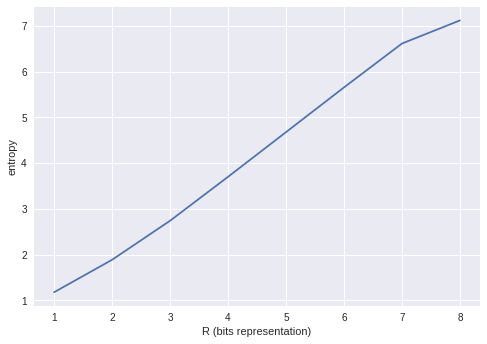

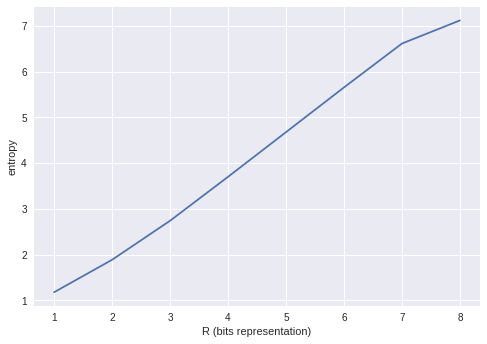

In [98]:
TotEntr = TotalEntropy(lena)
TotalEntropy(lena)

this is psnr - R plot right?

what we need is a function of total entropy, that I believe is a function of R, I am not sure it is the same


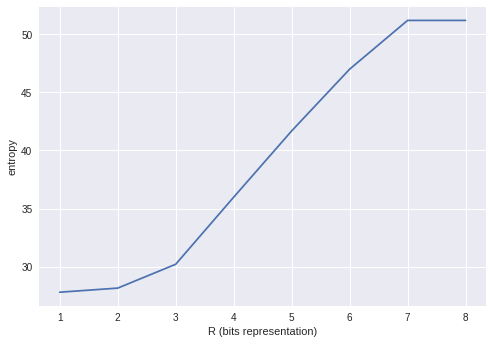

In [102]:
def psnr(input_img,R):
  return 10*np.log10((255**2)/getDistortion(input_img,R))
# psnr(lena,2)

def psnr_entropy(input_img):
  entropy={}
  R=np.arange(1,9)
  for i in R:
    entropy[i]=psnr(input_img,i)
  plt.figure()
  plt.xlabel('R (bits representation)')
  plt.ylabel('entropy')
  plt.plot(R,entropy.values())
  
psnr_entropy(lena)

## **Download this notebook as latex**

In [0]:
from google.colab import files
!apt install pandoc
!pip install pandoc
!git clone https://github.com/alvarogg777/colabCompression.git
!jupyter nbconvert colabCompression/Compress_Lab1.ipynb --to latex
!zip colabCompression/Compress_Lab1*
files.download('colabCompression/Compress_Lab1_files.zip')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  liblua5.1-0 libluajit-5.1-2 libluajit-5.1-common libyaml-0-2 pandoc-data
Suggested packages:
  texlive-latex-recommended texlive-xetex texlive-luatex pandoc-citeproc
  texlive-latex-extra context wkhtmltopdf
The following NEW packages will be installed:
  liblua5.1-0 libluajit-5.1-2 libluajit-5.1-common libyaml-0-2 pandoc
  pandoc-data
0 upgraded, 6 newly installed, 0 to remove and 12 not upgraded.
Need to get 7,150 kB of archives.
After this operation, 53.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libyaml-0-2 amd64 0.1.7-2ubuntu3 [47.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 liblua5.1-0 amd64 5.1.5-8.1build2 [100 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libluajit-5.1-common all 2.1.0~beta3+dfsg-5.1 [44.3 kB]
Get:4 http://archive.ub